Research on Titan's winning blocks

Author: Tripoli - Data Always \ Bryanzk
Date Modified: December 11, 2023 \ 2024.04.11
License: CC0

# Data Schema for winning block bid history data
block_datetime: datetime64[ns]
slot: int64
block_number: int64
block_hash: str
value: str
base_fee_per_gas: uint64
gas_limit: float64
gas_used: int64
num_tx: int64
builder_label: str
builder_pubkey: str
relay: str
bid_timestamp_ms: float64
slot_time_ms: float64
proposer_pubkey: str
proposer_mev_recipient: str
optimistic_submission: bool
builder_fee_recipient: str
block_timestamp: uint32
extra_data: str
payload_delivered: bool

# public keys from Titan: https://docs.titanbuilder.xyz/builder-public-keys 

0x94a076b27f294dc44b9fd44d8e2b063fb129bc85ed047da1cefb82d16e1a13e6b50de31a86f5b233d1e6bbaca3c69173

0xabf1ad5ec0512cb1adabe457882fa550b4935f1f7df9658e46af882049ec16da698c323af8c98c3f1f9570ebc4042a83

0xb67eaa5efcfa1d17319c344e1e5167811afbfe7922a2cf01c9a361f465597a5dc3a5472bd98843bac88d2541a78eab08

0xb26f96664274e15fb6fcda862302e47de7e0e2a6687f8349327a9846043e42596ec44af676126e2cacbdd181f548e681

0x95c8cc31f8d4e54eddb0603b8f12d59d466f656f374bde2073e321bdd16082d420e3eef4d62467a7ea6b83818381f742

0x8509ecb595da0eda2c6fced4e287f0510a2c2dba5f80ee930503ef86e268d808a6df25e397177da06cd479771ce66840

0xa32aadb23e45595fe4981114a8230128443fd5407d557dc0c158ab93bc2b88939b5a87a84b6863b0d04a4b5a2447f847

0xae2ffc6986c9a368c5ad2d51f86db2031d780f6ac9b2348044dea4e3a75808b566c935099de8b1a1609db322f2110e7a

0xb4a435cf816291596fe2e405651ec8b6c80b9cc34dace3c83202ca489a833756c9a0672ebdc17f23d9d43163db1caa5d

0xb47963246adef02cd3e61cbb648c04fd99b05e28a616aef3aa7fb688c17b10d1ce9662b61a600efbdd110e93d62d5144

0xaf10542267816e91adbc8f4a6754765d492534f8325f34a2e89caa2ba45c7158f6deaa6e7fb454ebb6f6a1495fe63dba

0x94829e6f7a598a2f2dfdd9e1246d7cfdc30a626666d9419f3c147cc954507e97184c598dc109f4d05c2139c48af6746c

In [1]:
from data_prep_utils import *
# prep the single block number for the single block bidding analysis
singleBlockNumber = 19440423

In [2]:
dft = get_titan_won_921_blocks_bidding_data()
unique_block_numbers_won_by_titan = dft['block_number'].unique()

In [3]:
df = get_block_data_with_winning_bids()


In [4]:
## Code below is to check if there are any records with the same block_number but different bid_timestamp
## and the recult is yes. like block: 18320012
# Get rows with duplicate block_numbers
# dups = df[df.duplicated(subset=['block_number'], keep=False)]

# # Check if any of those rows have different bid_timestamp
# dups_diff_bid = dups[dups.duplicated(subset=['block_number', 'bid_timestamp_ms'], keep=False)]

# if not dups_diff_bid.empty:
#     print("Found records with same block_number but different bid_timestamp:")
#     display(dups_diff_bid)
# else:
#     print("No records found with same block_number and different bid_timestamp.") 


In [5]:
## This section is used to prep builder related dataset for future grouping.

df_builder_info = get_builder_info()

unique_labels = df_builder_info['builder_label'].unique()
# prep titan builder data frame
titan_builder_labels = df_builder_info[df_builder_info['builder_label'].str.contains('titan', case=False)]

# prep EigenPhi builder data frame
eigenphi_builder_labels = df_builder_info[df_builder_info['builder_label'].str.contains('eigenphi', case=False)]

# prep rsync builder data frame
rsync_builder_labels = df_builder_info[df_builder_info['builder_label'].str.contains('rsync', case=False)]

# prep beaver builder data frame
beaver_builder_labels = df_builder_info[df_builder_info['builder_label'].str.contains('beaver', case=False)]

# # The code below can be used to check Titan's pubkeys: current vs.
# current_titan_pub_key_set = set(titan_pub_key_list)
# total_titan_labels_set = set(titan_labels['builder_pubkey'])

# only_in_titan_labels = total_titan_labels_set.difference(current_titan_pub_key_set)
# print(f"builder_pubkey's in total titan_labels but not in current titan_pub_key_list:\n {only_in_titan_labels}")
# # 计算差集
# only_in_titan_pub_key_list = current_titan_pub_key_set.difference(total_titan_labels_set)

# # 输出结果
# print(f"builder_pubkey's in current titan_pub_key_list but not in total titan_labels:\n {only_in_titan_pub_key_list}")


In [6]:
# analyze the bidding of block 19440930
dftb_0930 = dft[dft['block_number'] == singleBlockNumber]

# get the winning bid block info for reference
df_0930 = df[df['block_number'] == singleBlockNumber]

# now let's calculate the time difference
# take out the block final timestamp
# get the time difference between block final timestamp and bid timestamp

# Remove the ' UTC' from timestamp strings and convert to datetime
dftb_0930.loc[:, 'block_timestamp'] = pd.to_datetime(dftb_0930['block_timestamp'].str.replace(' UTC', ''), format='%Y-%m-%d %H:%M:%S', errors='coerce')
dftb_0930.loc[:, 'timestamp'] = pd.to_datetime(dftb_0930['timestamp'].str.replace(' UTC', ''), format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

# 计算时间差并且存储在新的 Dataframe 中 Calculate the time difference and store it in a new Dataframe.
ts_diff_df = (dftb_0930['block_timestamp'] - dftb_0930['timestamp']).apply(lambda x: x.total_seconds()) * 1000

# 添加新的列到原始的 Dataframe 中.  Add a new column, ts_diff, as ms difference, to the original Dataframe.
# if ts_diff > 0, bid before 12s, if ts_diff<0, bid after 12s
dftb_0930 = pd.concat([dftb_0930, ts_diff_df.rename('ts_diff')], axis=1)

print(dftb_0930.shape[0])



2448


min:-3.0; max:7.0
Merged rows:2448


/var/folders/mf/lxpn1ltx7t97r1v1k92vly1w0000gn/T/ipykernel_27442/1353726915.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = merged_df.groupby(['builder_label', 'ts_diff_bins']).size().unstack(fill_value=0)


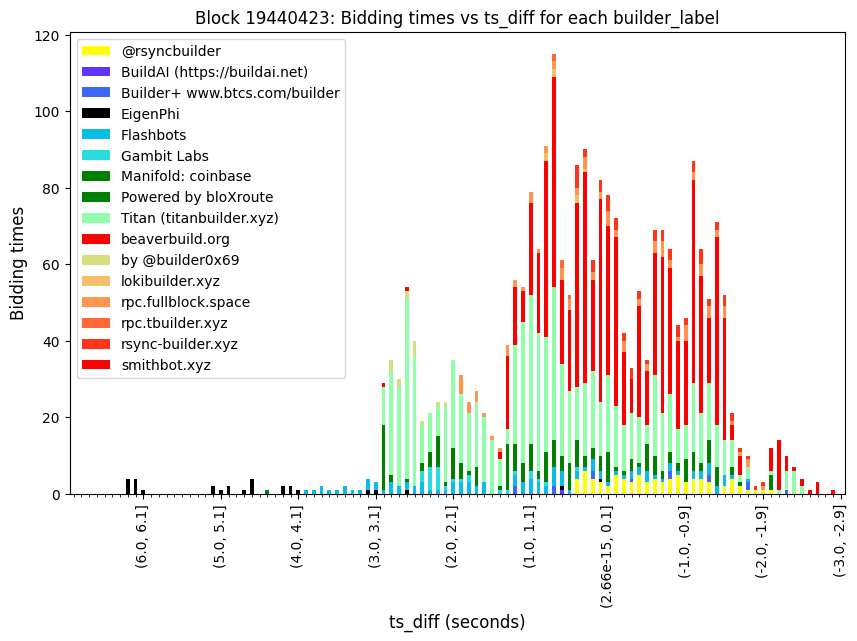

builder_label,@rsyncbuilder,BuildAI (https://buildai.net),Builder+ www.btcs.com/builder,EigenPhi,Flashbots,Gambit Labs,Manifold: coinbase,Powered by bloXroute,Titan (titanbuilder.xyz),beaverbuild.org,by @builder0x69,lokibuilder.xyz,rpc.fullblock.space,rpc.tbuilder.xyz,rsync-builder.xyz,smithbot.xyz
ts_diff_bins,,,,,,,,,,,,,,,,
"(-3.0, -2.9]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(-2.9, -2.8]",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
"(-2.8, -2.7]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(-2.7, -2.6]",0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
"(-2.6, -2.5]",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(6.5, 6.6]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(6.6, 6.7]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(6.7, 6.8]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Draw stack bar chart of the builder bidding distribution of a single block
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.ticker as ticker

# 将 `ts_diff` 从毫秒转换为秒
dftb_0930['ts_diff_secs'] = dftb_0930['ts_diff'] / 1000

# 计算 ts_diff 的最小和最大值
x_min = np.floor(dftb_0930['ts_diff_secs'].min())
x_max = np.ceil(dftb_0930['ts_diff_secs'].max())
print ("min:" + str(x_min) + "; max:" + str(x_max))

# 创建 `ts_diff_secs` 的区间（每0.1秒）
dftb_0930['ts_diff_bins'] = pd.cut(
    dftb_0930['ts_diff_secs'], 
    np.arange(x_min, x_max + 0.1, 0.1)  # 使用 x_min 和 x_max
)

df_builder_info = df_builder_info.drop_duplicates(subset=['builder_pubkey', 'builder_label'])

merged_df = pd.merge(dftb_0930, df_builder_info, on='builder_pubkey', how='inner')
print("Merged rows:" + str(merged_df.shape[0]))

grouped = merged_df.groupby(['builder_label', 'ts_diff_bins']).size().unstack(fill_value=0)


highlight_labels = [label.lower() for label in ["EigenPhi", "rsync", "titan", "Beaver"]]

# 创建颜色映射
labels = merged_df['builder_label'].unique()

normal_colors = cm.rainbow(np.linspace(0, 1, len(labels)))
highlight_colors = ["red", "green", "black", "yellow"] 

color_map = {}
labels_list = list(labels)  # 将numpy数组转换为列表

for label in labels:
    # 如果该标签包含 highlight_labels 中的任何一个，则将其视为高亮标签
    if any(hl in label.lower() for hl in highlight_labels):
        color_map[label] = highlight_colors[highlight_labels.index(next(hl for hl in highlight_labels if hl in label.lower()))]
    else:
        color_map[label] = normal_colors[labels_list.index(label)]  # 使用列表的index方法


ax = grouped.T.plot(kind='bar', stacked=True, color=[color_map[i] for i in labels], figsize=(10,6))

# 在生成图之前，先获取并排序图例标签
handles, labels = ax.get_legend_handles_labels()  
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))



ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))  # 设置主要刻度为1秒
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=1))   # 设置次要刻度为0.1秒

# 逆转x轴
ax.invert_xaxis()

plt.xlabel('ts_diff (seconds)', fontsize=12)
plt.ylabel('Bidding times', fontsize=12)
plt.title('Block '+ str(singleBlockNumber) + ': Bidding times vs ts_diff for each builder_label')

# 使用排序后的标签和句柄来创建图例
ax.legend(handles, labels)  

plt.show()

# save the grouped data to clipboard
from IPython.display import display
grouped_transposed = grouped.transpose()
display(grouped_transposed)
grouped_transposed.to_clipboard(index=True, header=True)


In [ ]:
# Commented code for testing Titan builder and its pubkeys
# df_titan_unique = df[df['builder_label'].str.contains("Titan", na=False)]
# df_titan_unique = df_titan_unique.drop_duplicates(subset=['builder_pubkey'])
# df_titan_unique_filtered = df_titan_unique[df_titan_unique['builder_pubkey'].isin(filtered_pub_key_list)]
# print(df_titan_unique_filtered[['builder_label', 'builder_pubkey']])
# num_rows = df_titan_unique_filtered.shape[0]
# print(num_rows)

df_titan_blocks = df[df['builder_pubkey'].isin(titan_pub_key_list)]
df_titan_filtered_blocks = df_titan_blocks[df_titan_blocks['block_number'] < singleBlockNumber]
df_titan_first_1000_blocks = df_titan_filtered_blocks.sort_values(by='block_number', ascending=False).head(1000)
# df_titan_first_1000_blocks.to_csv('titan_first_1000_blocks.csv', index=False)

# print(df_titan_first_1000_blocks.head(10))


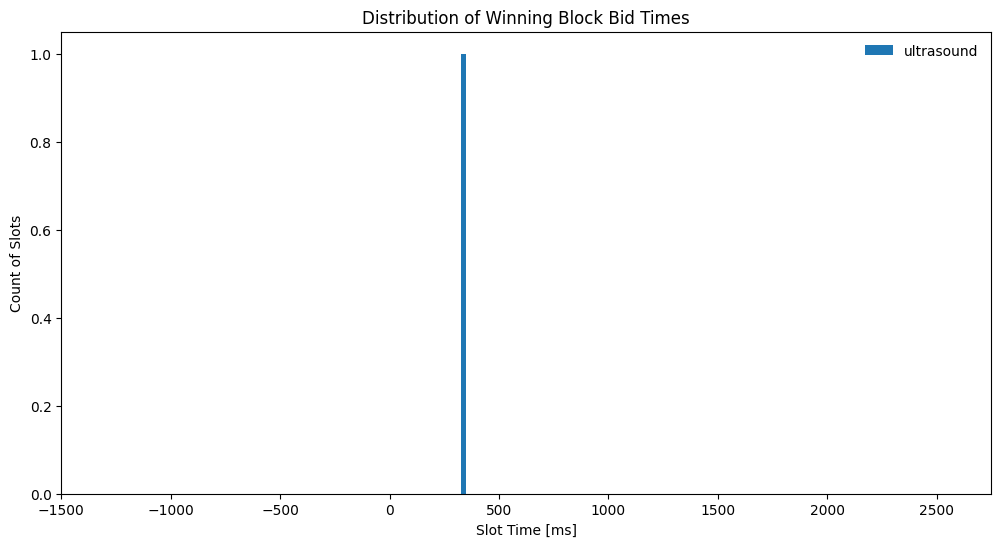

In [ ]:
relays = list(df['relay'].value_counts().head(5).index)

fig = plt.figure(figsize = (12, 6))
plt.title('Distribution of Winning Block Bid Times')

bin_size = 25
bins = np.arange(-12000, 12000, bin_size)

df_counts = pd.DataFrame()
for xx in range(len(relays)):
    df_counts = pd.concat([df_counts, df[df['relay'] == relays[xx]]])
    plt.hist([x-12000 for x in df_counts['slot_time_ms']], bins=bins, label = relays[xx], zorder = 1 - xx/100)

plt.xlim([-1500, 2750])
plt.xlabel('Slot Time [ms]')
plt.ylabel('Count of Slots')
plt.ylim([0, None])

plt.legend(loc = 'upper right', frameon=False)
plt.show()